In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
import os
import warnings

drive.mount('/content/drive')
PROJECT_PATH = '/content/drive/MyDrive/Estudos/Pos-graduacao - Ciencia de Dados e  Analytics/Sprints/Sprint II - Machine Learning and Advanced Analytics/Previsao Salarios Com  Regresaao/Code'
os.chdir(PROJECT_PATH)
warnings.filterwarnings('ignore')



#import custom packages
from Preprocessing.CleanData.DataFilter import DataFilter

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
salaries_df = pd.read_csv('/content/drive/MyDrive/Estudos/Pos-graduacao - Ciencia de Dados e  Analytics/Sprints/Sprint II - Machine Learning and Advanced Analytics/Previsao Salarios Com  Regresaao/Dataset/Salary_Data.csv')
salaries_df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [3]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [4]:
salaries_df[salaries_df.isnull().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [5]:
#Get out all row that has some NaN value

salaries_df_preprocessed = salaries_df[~salaries_df.isnull().any(axis=1)]

## Análise exploratória dos dados e pré-processamento

### Variáveis Numéricas

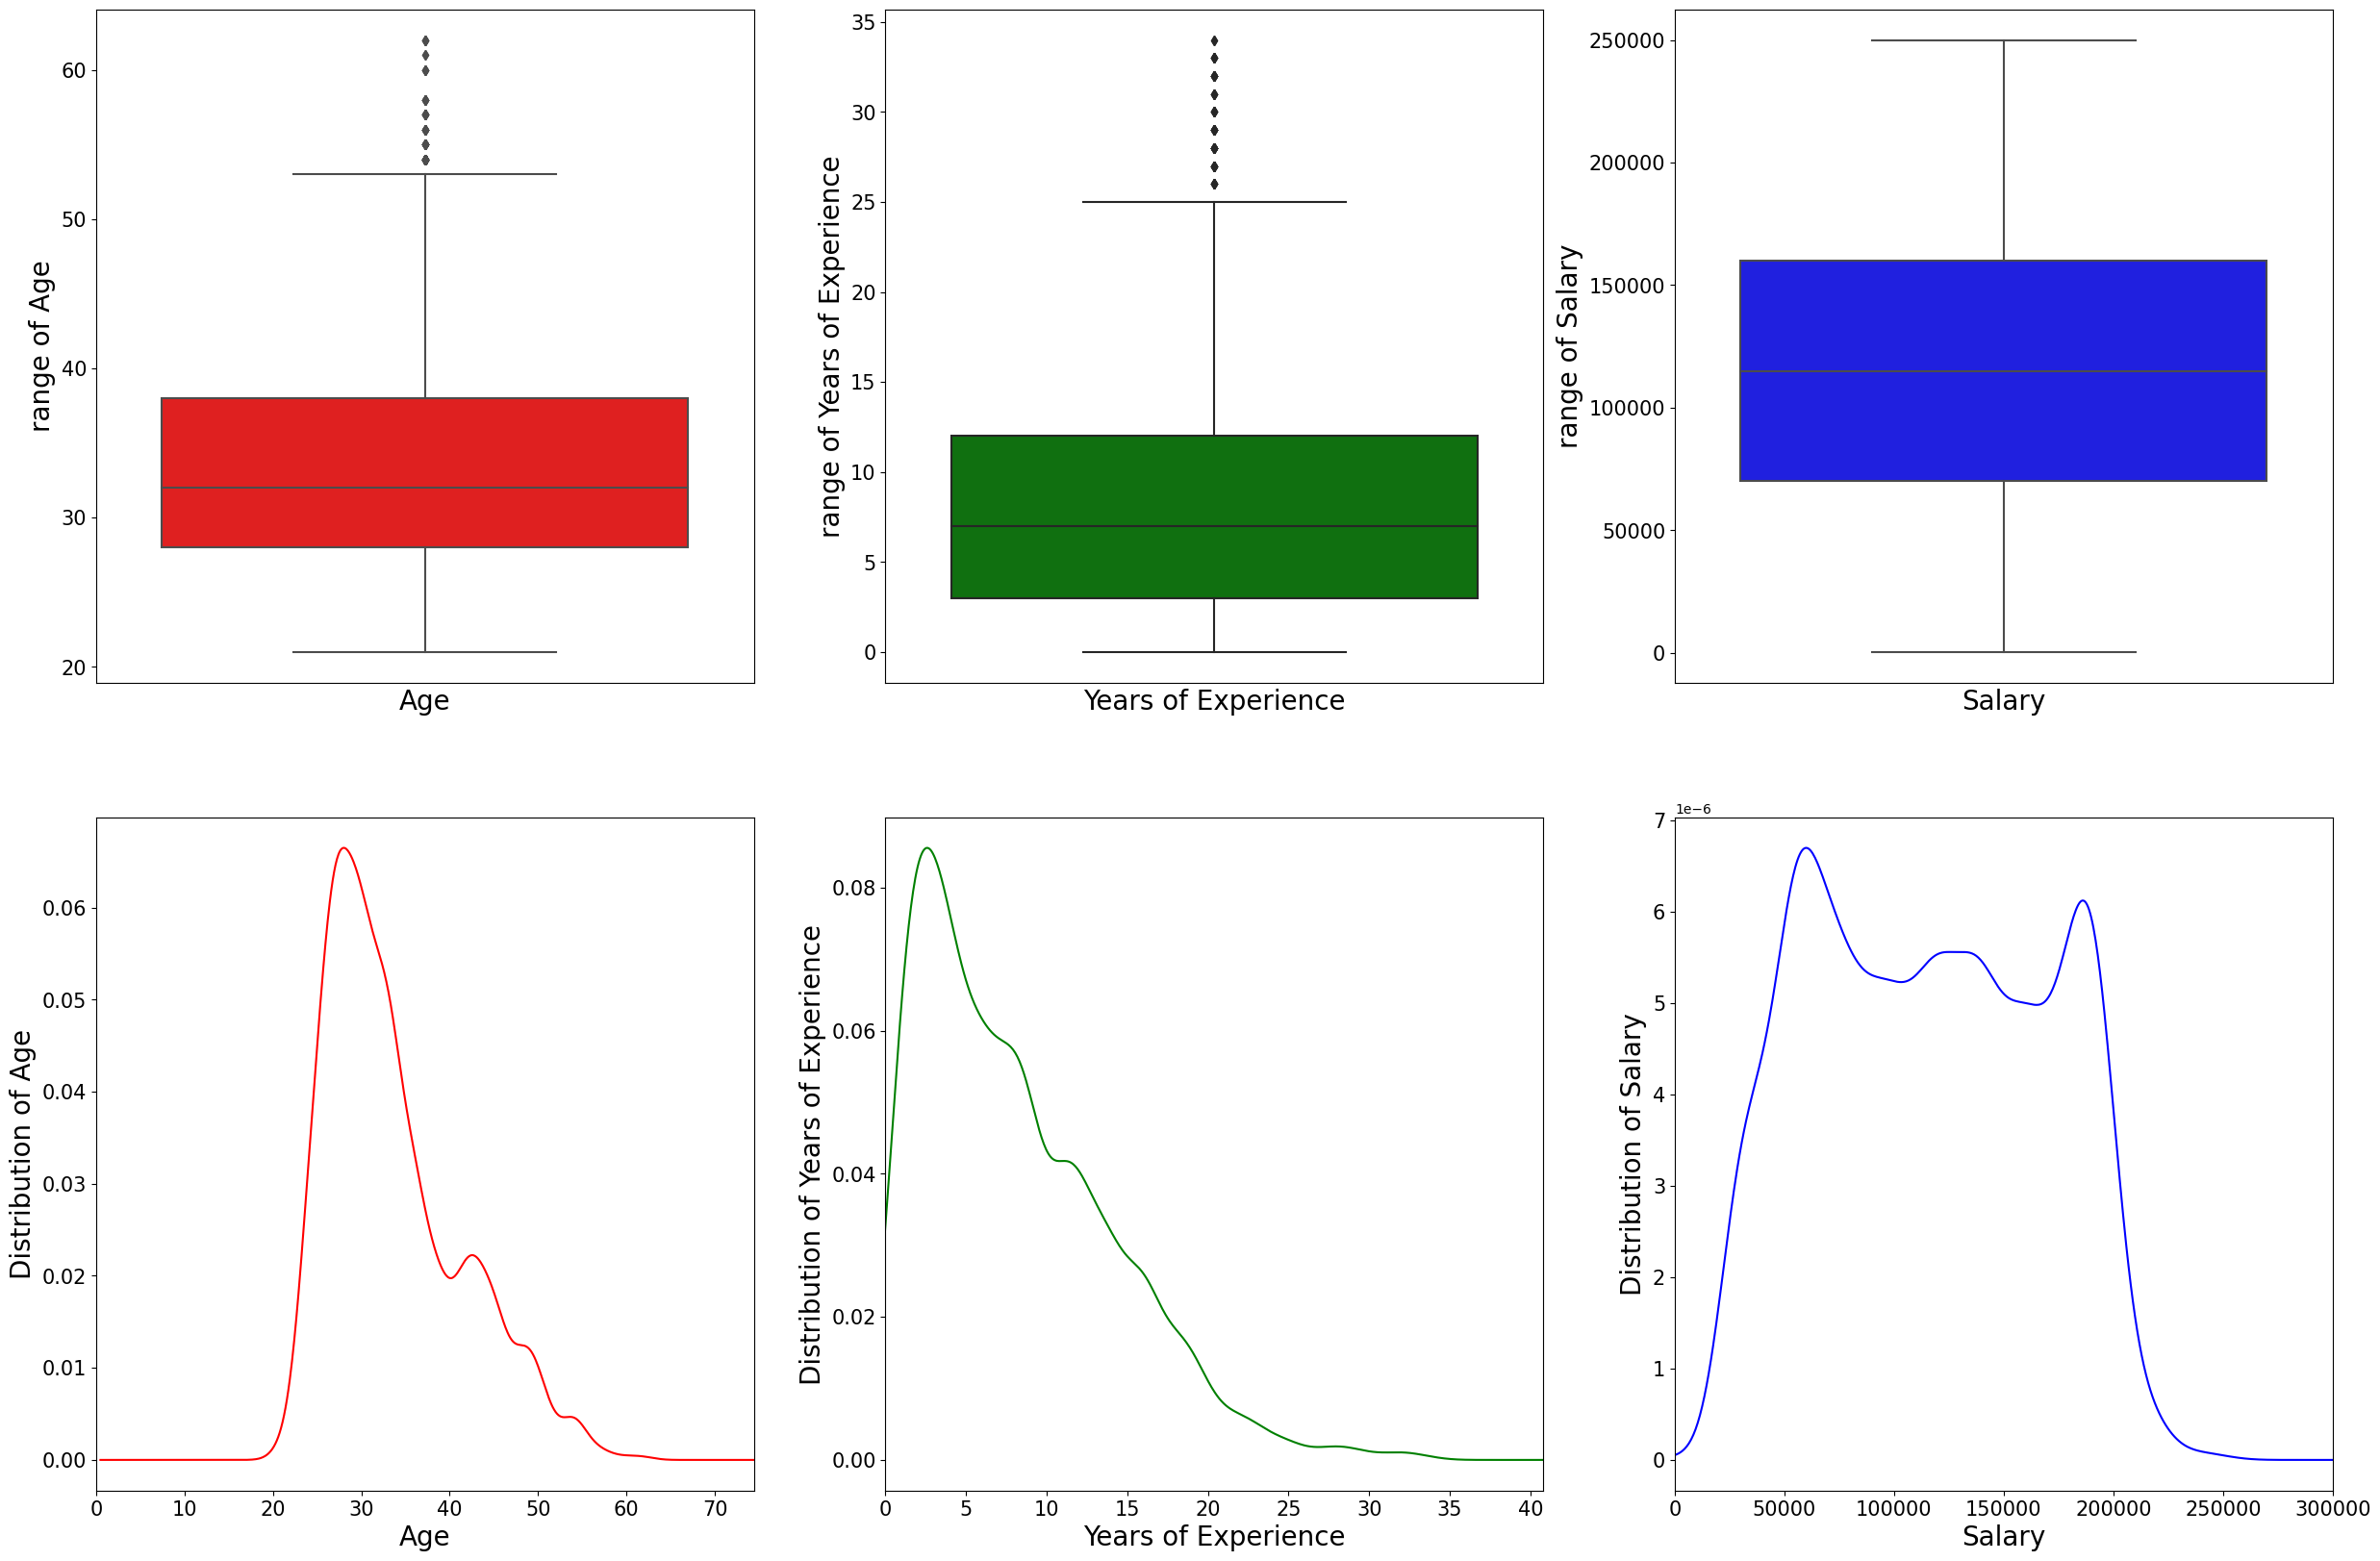

In [6]:
#check numerical vars
fig, axs = plt.subplots(2,3, figsize=(30,20))
NUMERICAL_VARS = ['Age', 'Years of Experience', 'Salary']
NUM_VARS_COLORS = ['red','green', 'blue']
for i, var in enumerate(NUMERICAL_VARS):
  
  #boxplot

  axis = sns.boxplot(salaries_df_preprocessed[var], ax=axs[0][i], color = NUM_VARS_COLORS[i])
  axis.set_xlabel(var, fontsize = 20)
  axis.set_ylabel(f'range of {var}', fontsize = 20)
  axis.tick_params(axis='both', which='major', labelsize=15)
  axis.set_xticks([])
  #Density plot

  axis = salaries_df_preprocessed[var].plot(kind='density', color= NUM_VARS_COLORS[i], ax=axs[1][i])
  axis.set_xlabel(var, fontsize = 20)
  axis.set_ylabel(f'Distribution of {var}', fontsize = 20)
  axis.tick_params(axis='both', which='major', labelsize=15)
  axis.set_xlim([0, np.max(salaries_df_preprocessed[var])*1.2])



In [7]:
# Filtering outliers on numerical data bu IRQ
for i, num_var in enumerate(NUMERICAL_VARS):
  outlier_filter_IRQ = DataFilter(filter_by='FILTER_OUTLIERS_BY_IQR', col=num_var)
  salaries_df_preprocessed = outlier_filter_IRQ.process_data(salaries_df_preprocessed)

Performing Data Filtering... 
Data Filtering DONE ! 

Performing Data Filtering... 
Data Filtering DONE ! 

Performing Data Filtering... 
Data Filtering DONE ! 



In [8]:
axs

array([[<Axes: xlabel='Age', ylabel='range of Age'>,
        <Axes: xlabel='Years of Experience', ylabel='range of Years of Experience'>,
        <Axes: xlabel='Salary', ylabel='range of Salary'>],
       [<Axes: xlabel='Age', ylabel='Distribution of Age'>,
        <Axes: xlabel='Years of Experience', ylabel='Distribution of Years of Experience'>,
        <Axes: xlabel='Salary', ylabel='Distribution of Salary'>]],
      dtype=object)

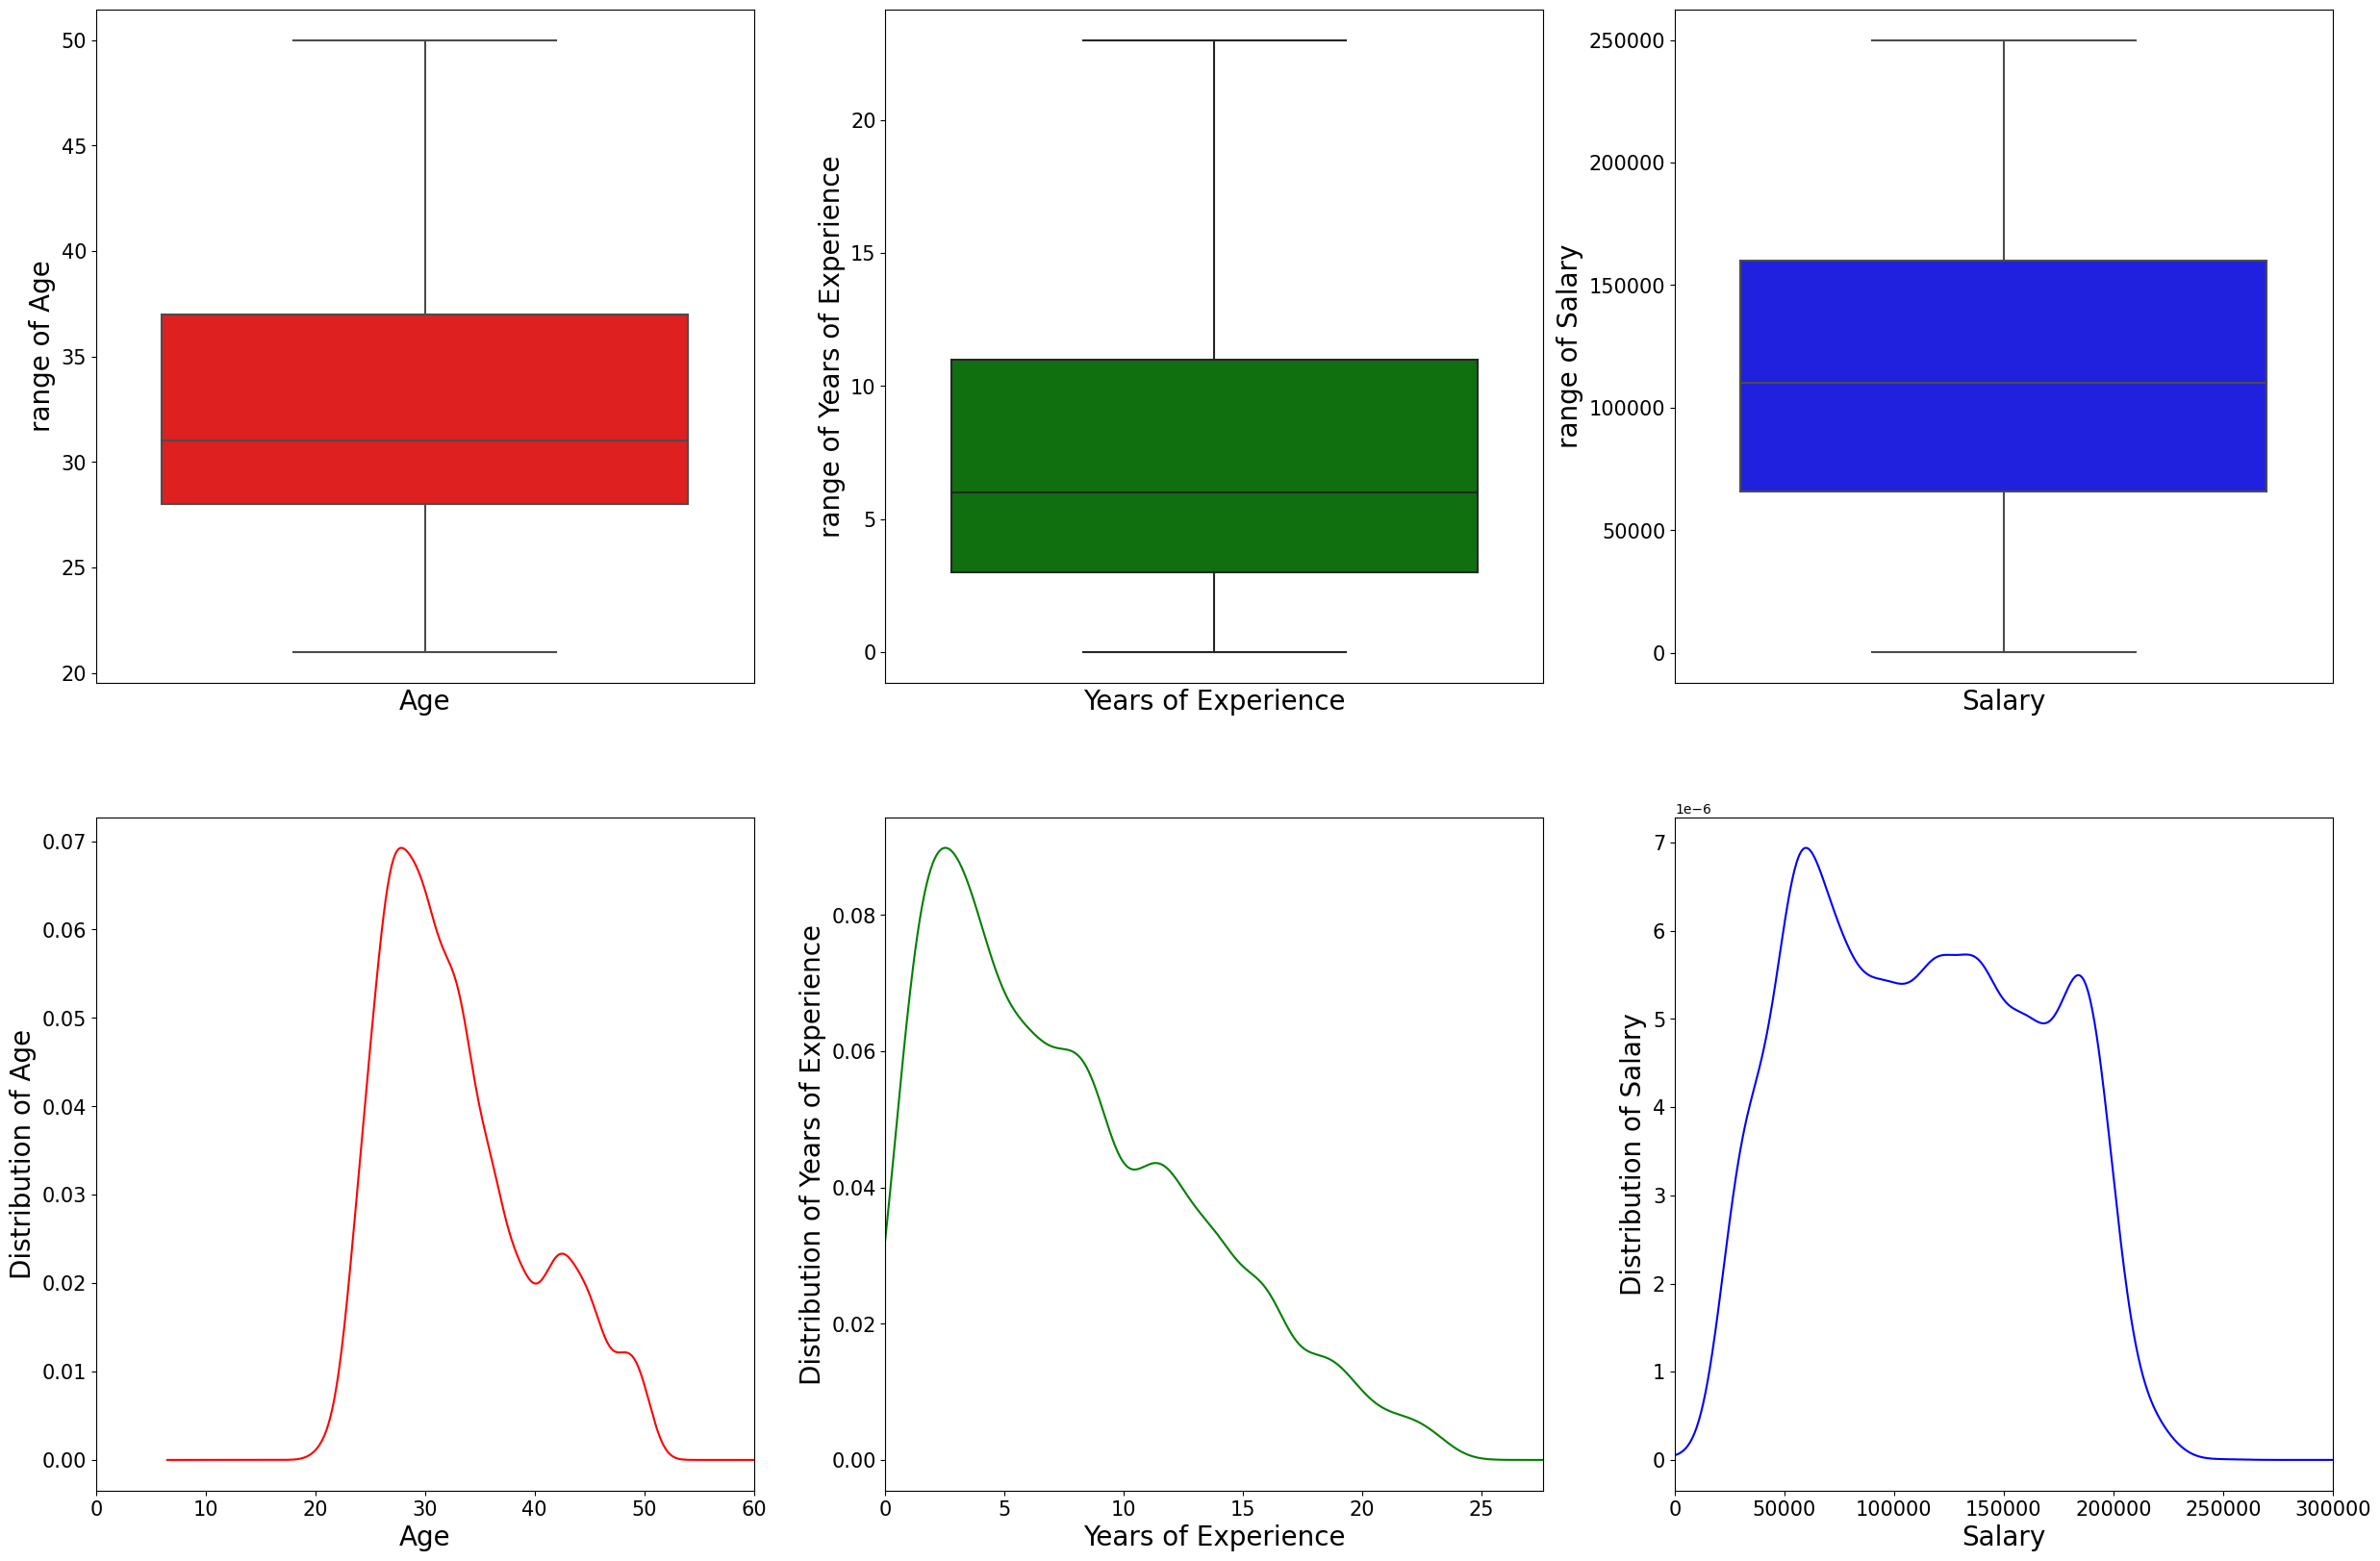

In [9]:
#check numerical vars
fig, axs = plt.subplots(2,3, figsize=(30,20))
NUMERICAL_VARS = ['Age', 'Years of Experience', 'Salary']
NUM_VARS_COLORS = ['red','green', 'blue']
for i, var in enumerate(NUMERICAL_VARS):
  
  #boxplot

  axis = sns.boxplot(salaries_df_preprocessed[var], ax=axs[0][i], color = NUM_VARS_COLORS[i])
  axis.set_xlabel(var, fontsize = 20)
  axis.set_ylabel(f'range of {var}', fontsize = 20)
  axis.tick_params(axis='both', which='major', labelsize=15)
  axis.set_xticks([])
  #Density plot

  axis = salaries_df_preprocessed[var].plot(kind='density', color= NUM_VARS_COLORS[i], ax=axs[1][i])
  axis.set_xlabel(var, fontsize = 20)
  axis.set_ylabel(f'Distribution of {var}', fontsize = 20)
  axis.tick_params(axis='both', which='major', labelsize=15)
  axis.set_xlim([0, np.max(salaries_df_preprocessed[var])*1.2])

### Variáveis Categoricas 

<Axes: >

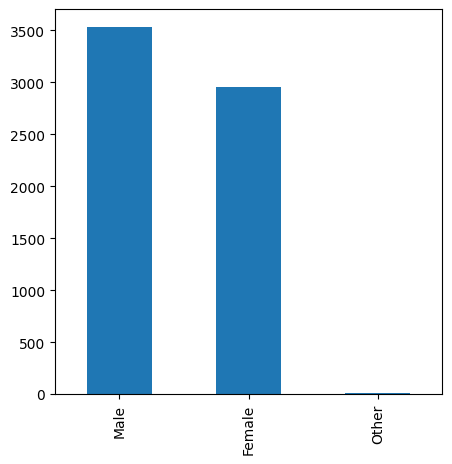

In [10]:
plt.figure(figsize=(5,5))
salaries_df_preprocessed['Gender'].value_counts().plot(kind='bar')

<Axes: >

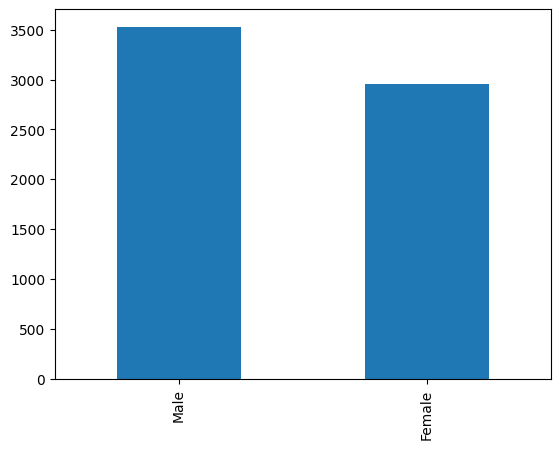

In [11]:
salaries_df_preprocessed = salaries_df_preprocessed[salaries_df_preprocessed['Gender'] != 'Other']
salaries_df_preprocessed['Gender'].value_counts().plot(kind='bar')

<Axes: >

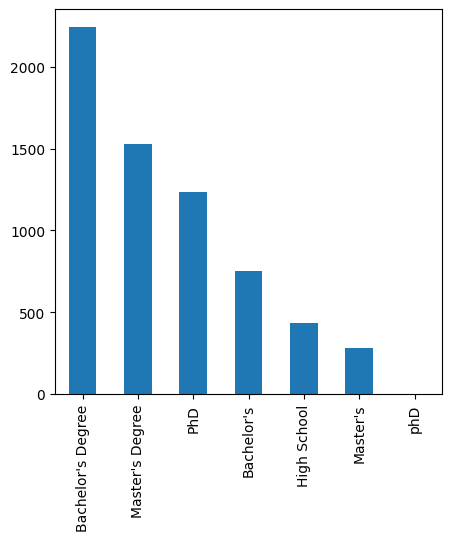

In [12]:
plt.figure(figsize=(5,5))
salaries_df_preprocessed['Education Level'].value_counts().plot(kind='bar')

<Axes: >

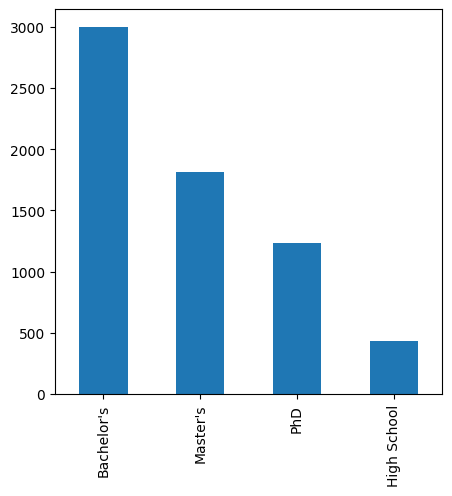

In [13]:
salaries_df_preprocessed['Education Level'] = salaries_df_preprocessed['Education Level'].replace('Bachelor\'s Degree','Bachelor\'s')
salaries_df_preprocessed['Education Level'] = salaries_df_preprocessed['Education Level'].replace('Master\'s Degree','Master\'s')
salaries_df_preprocessed['Education Level'] = salaries_df_preprocessed['Education Level'].replace('phD','PhD')

plt.figure(figsize=(5,5))
salaries_df_preprocessed['Education Level'].value_counts().plot(kind='bar')

<Axes: >

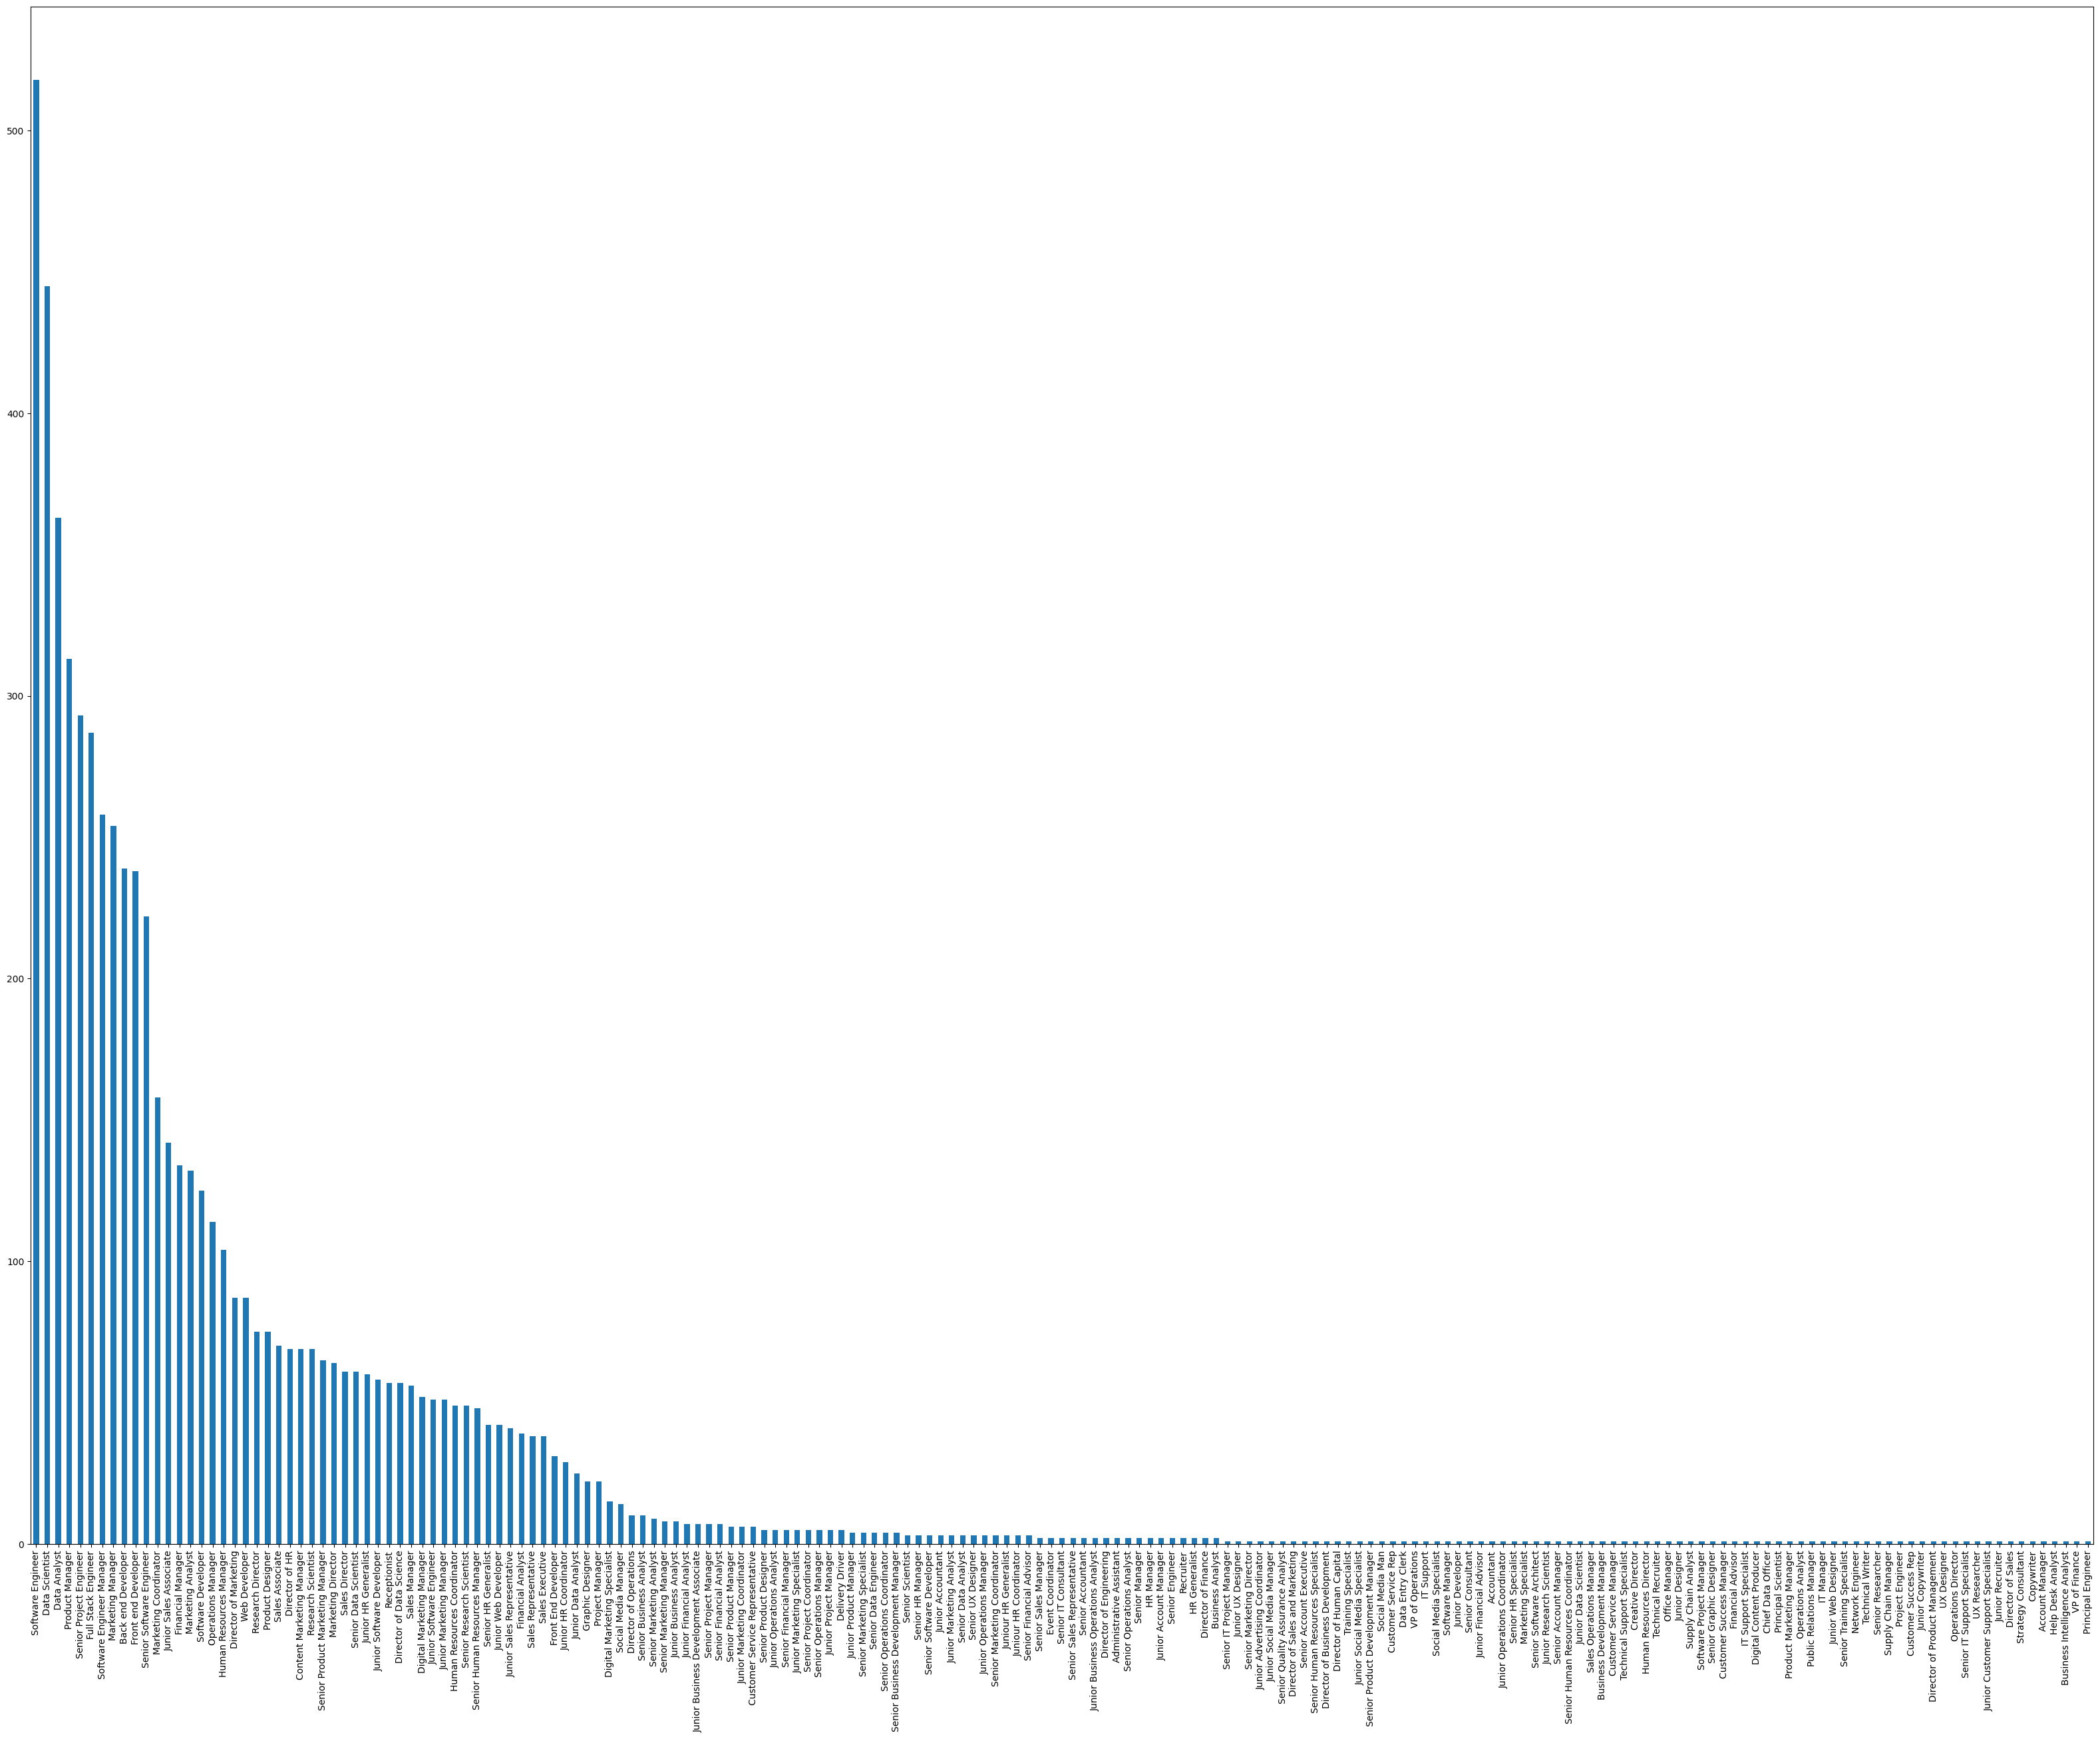

In [14]:
plt.figure(figsize=(40,30))
salaries_df_preprocessed['Job Title'].value_counts().plot(kind='bar')

In [15]:
sum(salaries_df_preprocessed['Job Title'].value_counts()[salaries_df_preprocessed['Job Title'].value_counts() < 30].values)

427

In [16]:
sum(salaries_df_preprocessed['Job Title'].value_counts()[salaries_df_preprocessed['Job Title'].value_counts() < 30].values)/len(salaries_df_preprocessed)*100

6.592558283155782

Performing Data Filtering... 
Data Filtering DONE ! 



<Axes: >

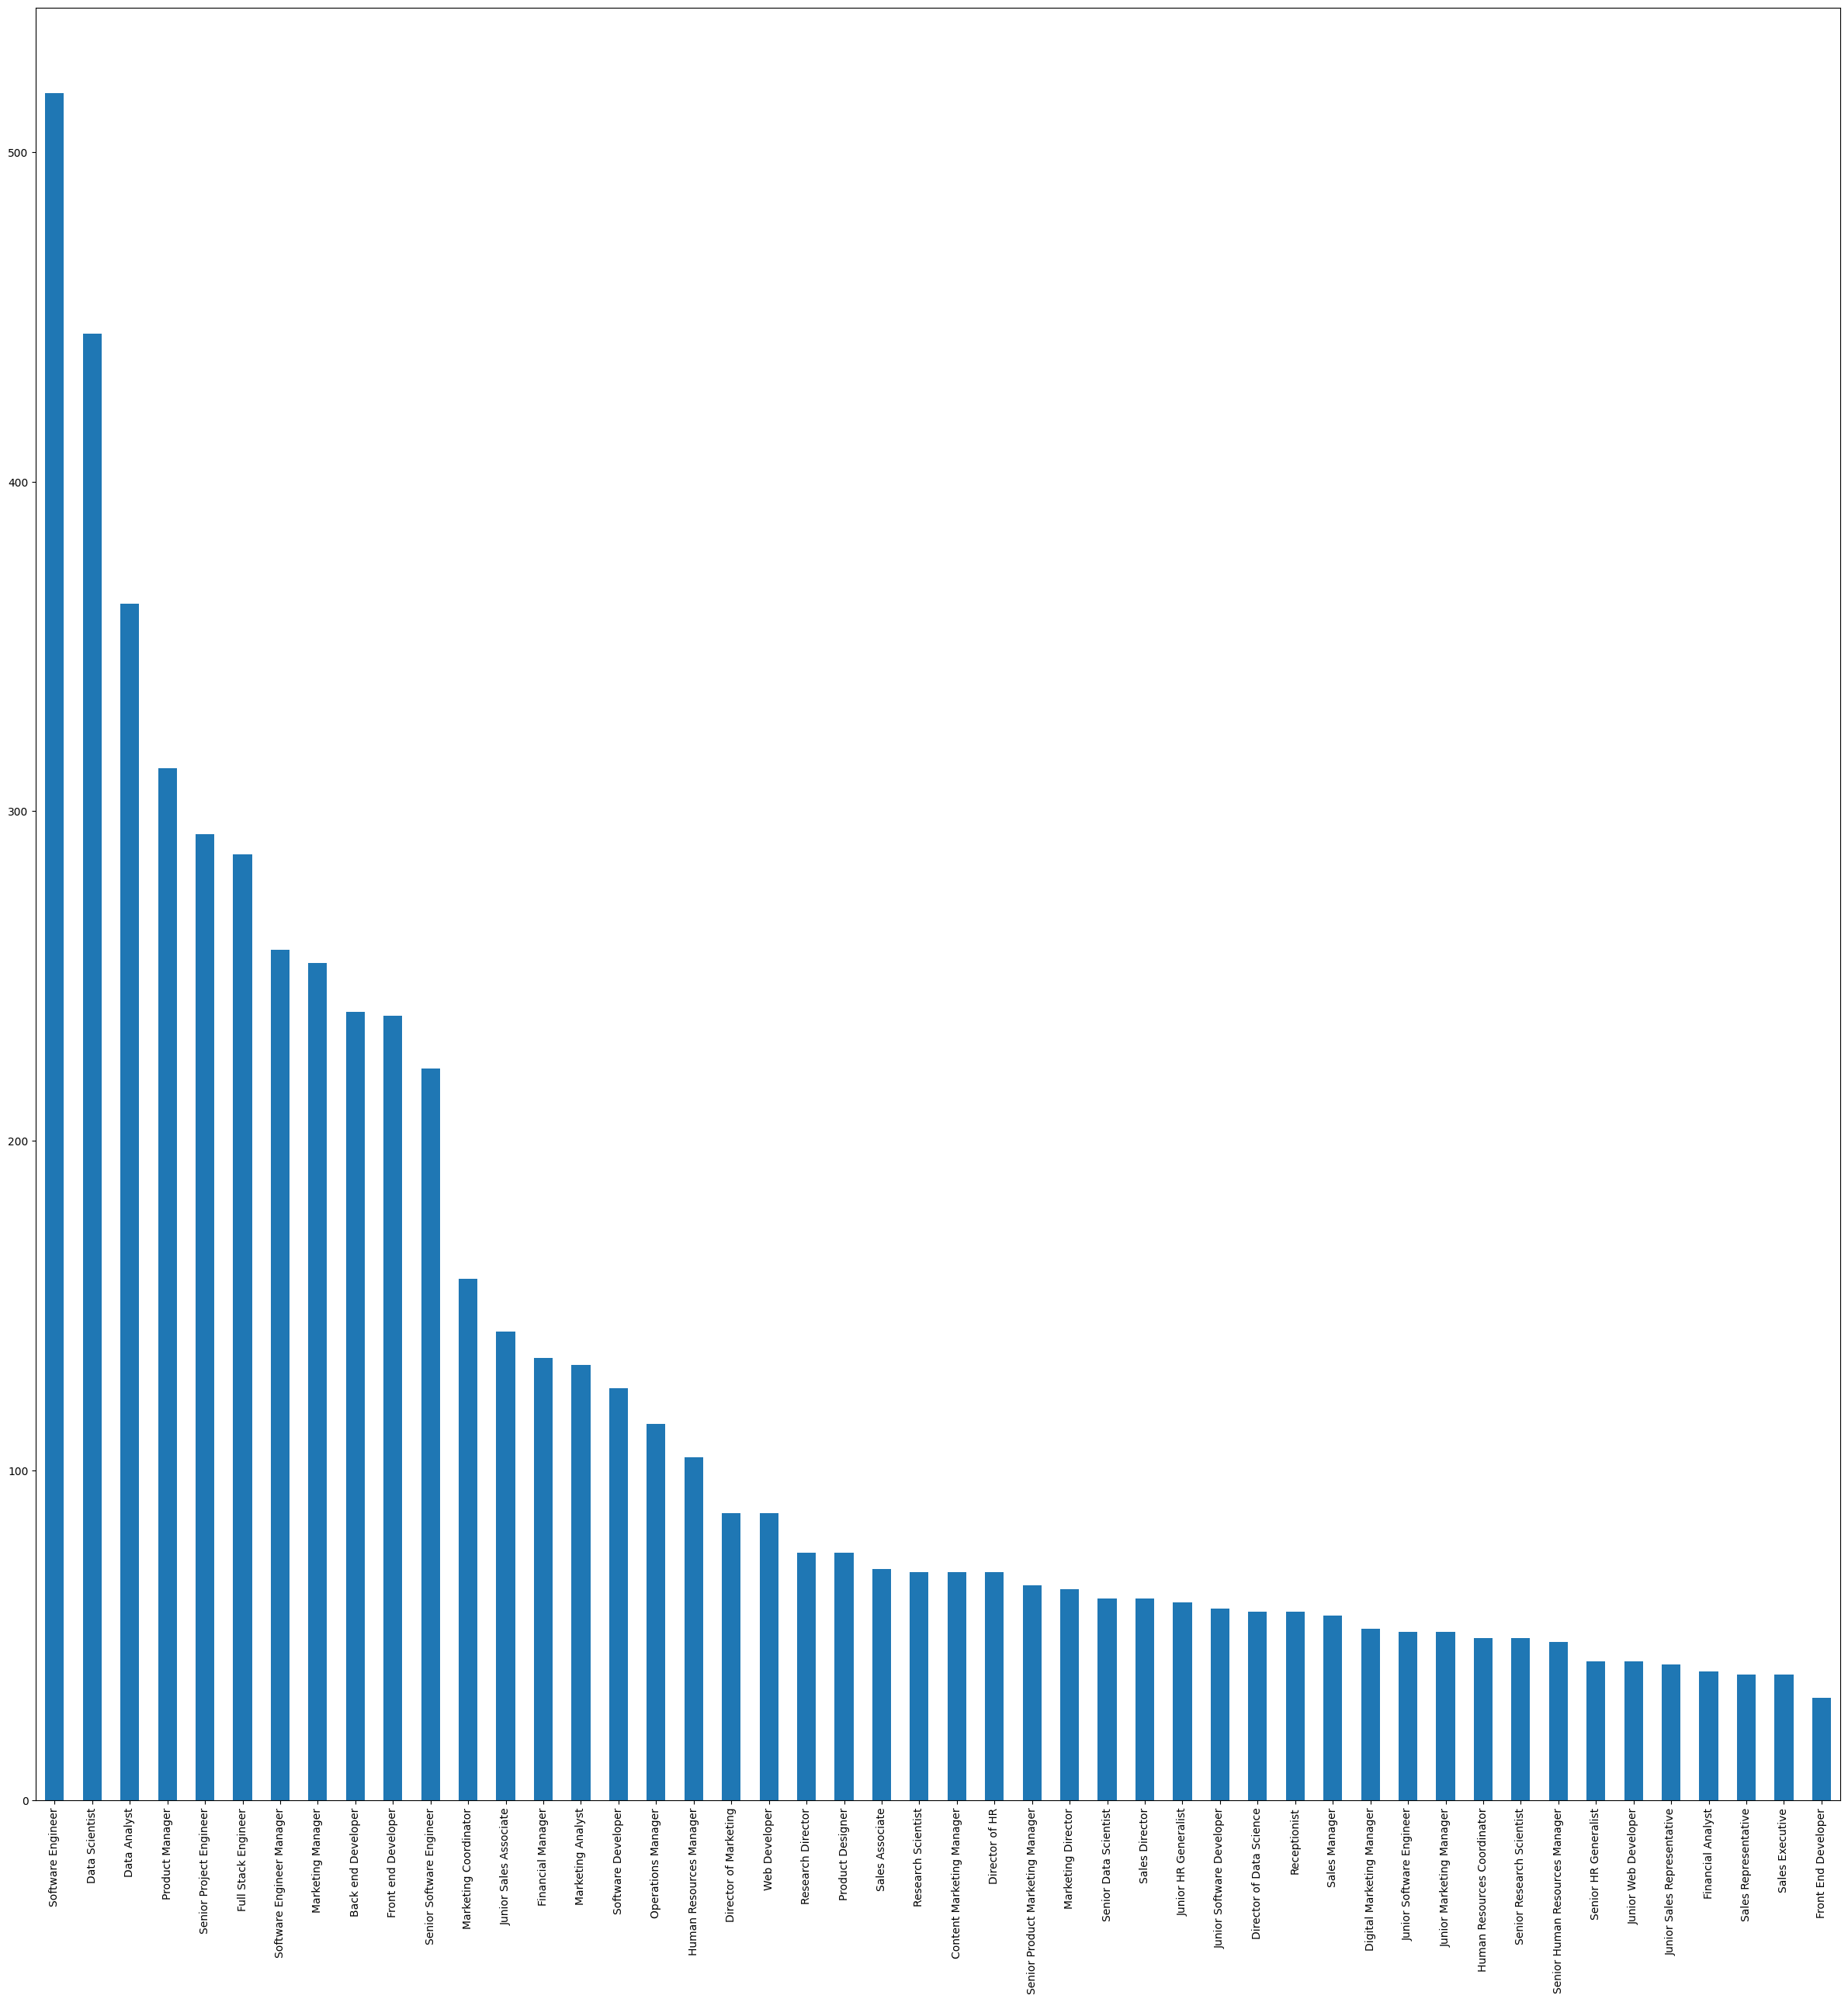

In [17]:
plt.figure(figsize=(30,30))
filtering_less_freq_job_title = DataFilter(filter_by='FREQ_LOWER_THAN_VALUE', by_value =  30, col='Job Title')
filtering_less_freq_job_title.process_data(salaries_df_preprocessed)['Job Title'].value_counts().plot(kind='bar')

In [18]:
salaries_df_preprocessed = filtering_less_freq_job_title.process_data(salaries_df_preprocessed)

Performing Data Filtering... 
Data Filtering DONE ! 



In [19]:
salaries_df_preprocessed['Job Title'].value_counts()

Software Engineer                   518
Data Scientist                      445
Data Analyst                        363
Product Manager                     313
Senior Project Engineer             293
Full Stack Engineer                 287
Software Engineer Manager           258
Marketing Manager                   254
Back end Developer                  239
Front end Developer                 238
Senior Software Engineer            222
Marketing Coordinator               158
Junior Sales Associate              142
Financial Manager                   134
Marketing Analyst                   132
Software Developer                  125
Operations Manager                  114
Human Resources Manager             104
Director of Marketing                87
Web Developer                        87
Research Director                    75
Product Designer                     75
Sales Associate                      70
Research Scientist                   69
Content Marketing Manager            69


## Analise de correlação das Features

---



Text(1058.1767676767674, 0.5, 'Yeas of Expirience')

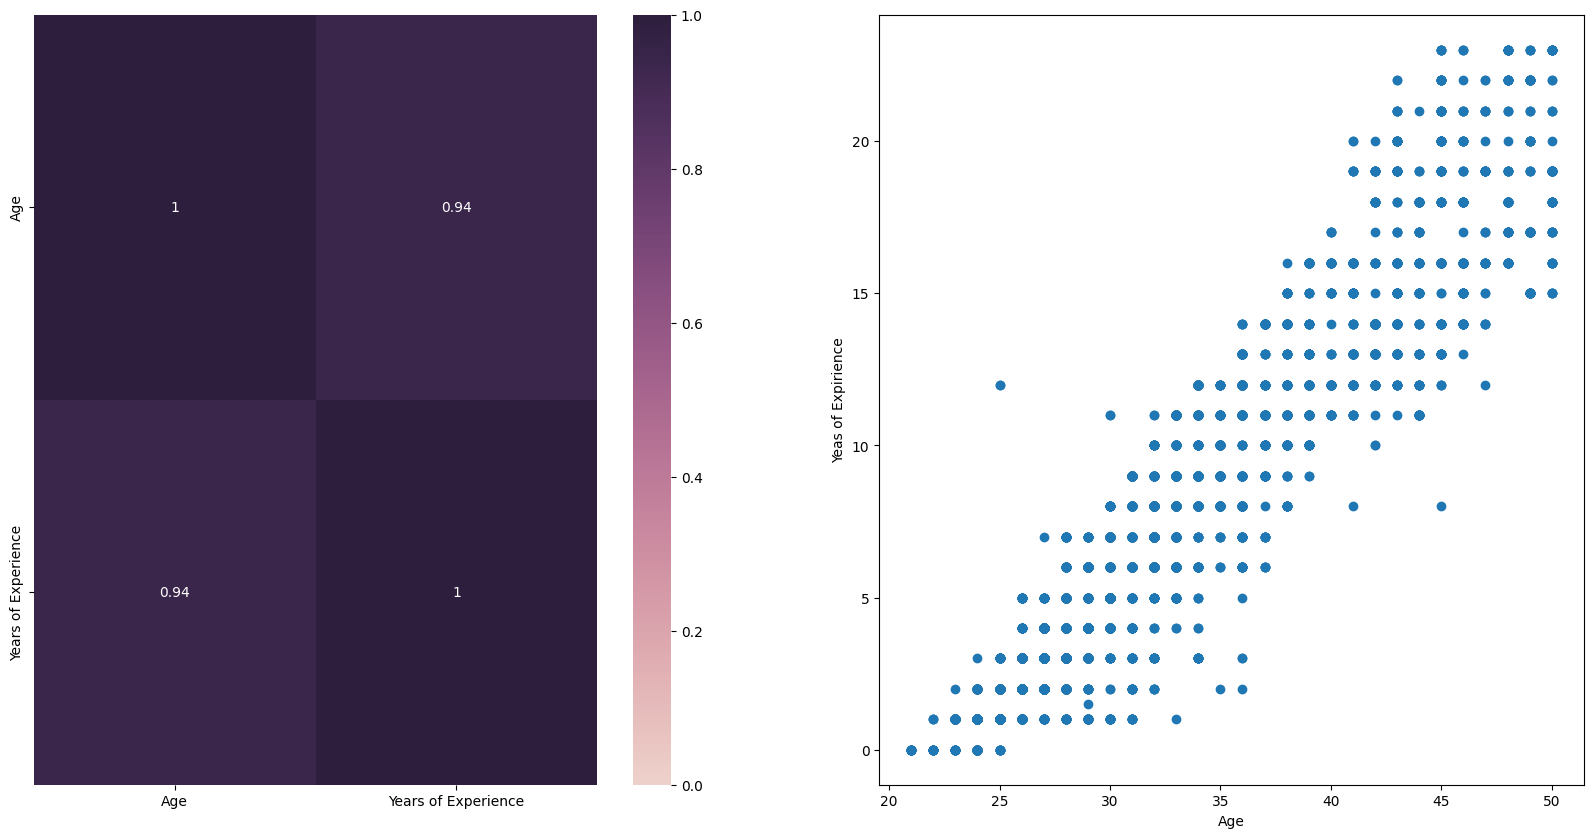

In [20]:
fig, axs = plt.subplots(1,2, figsize=(20,10))


# Plot heatmap

features = salaries_df_preprocessed.drop(['Salary'], axis =1)
palette = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(features.corr(), annot=True, cmap=palette, vmin=0, vmax=1,ax=axs[0])


#plot Scatterplot
ages = salaries_df_preprocessed['Age'].values
years_of_expirience = salaries_df_preprocessed['Years of Experience'].values
axs[1].scatter( ages ,years_of_expirience)
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Yeas of Expirience')



É nítido que as variáveis "Age" e "Years of Expirience" são redundantes, logo não sentido usar as duas no modelo. Com isso é necessário eliminar uma delas. Ficaremos então com a variável Yeas of Expirience e eliminaremos a variável "Age", já que faz todo sentido que quanto mais velha uma pessoa for, mas anos de experiência ela terá.

In [21]:
salaries_df_preprocessed.drop(['Age'], axis = 1, inplace=True)

### Transformação das variáveis numéricas em categóricas

In [22]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [23]:
#instantiate encorders

label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()

# Gender tranformation

salaries_df_preprocessed['Gender'] = label_encoder.fit_transform(salaries_df_preprocessed['Gender'])

#Educational Level Transformation

salaries_df_preprocessed['Education Level'] = ordinal_encoder.fit_transform(salaries_df_preprocessed[['Education Level']])


# Job Title Transformation



In [24]:
# Transform Job title on its dummie code

job_categories = list(pd.get_dummies(salaries_df_preprocessed['Job Title']).columns)
salaries_df_preprocessed[job_categories] = pd.get_dummies(salaries_df_preprocessed['Job Title'])
salaries_df_preprocessed.drop(['Job Title'], axis=1, inplace=True)

In [25]:
salaries_df_preprocessed.head(20)

,Gender,Education Level,Years of Experience,Salary,Back end Developer,Content Marketing Manager,Data Analyst,Data Scientist,Digital Marketing Manager,Director of Data Science,...,Senior HR Generalist,Senior Human Resources Manager,Senior Product Marketing Manager,Senior Project Engineer,Senior Research Scientist,Senior Software Engineer,Software Developer,Software Engineer,Software Engineer Manager,Web Developer
0,1,0.0,5.0,90000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,2.0,3.0,65000.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,7.0,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0.0,2.0,55000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,2.0,12.0,120000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0.0,4.0,80000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0.0,1.0,45000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,2.0,3.0,75000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12,1,0.0,6.0,65000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1,0.0,16.0,125000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modelagem

In [26]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split


# Data preparation for modeling

X  = salaries_df_preprocessed.drop('Salary',axis = 1).values
y = salaries_df_preprocessed['Salary'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7)

# Create fold to perform validation

partitions = 7
kfold = KFold(n_splits = partitions, shuffle = True, random_state = 7 )

In [27]:
import random

def generate_random_hex_colors(length):
    hex_colors = []
    for _ in range(length):
        hex_color = '#{:06x}'.format(random.randint(0, 0xFFFFFF))
        hex_colors.append(hex_color)
    return hex_colors


In [28]:
from ModelEvaluation.RegressionModelsEvaluator import RegressionModelsEvaluator
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, VotingRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor


models = []

# Preparing the models to the competition

models.append( ('LR', LinearRegression() ) )
models.append( ('CART', DecisionTreeRegressor() ) )
models.append( ('KNN', KNeighborsRegressor() ))
models.append( ('SVM', SVR() ))
models.append( ('RF', RandomForestRegressor() ))
models.append( ('ADA', AdaBoostRegressor() ))
models.append( ('VOTING', VotingRegressor( [( 'LRV', LinearRegression() ), ('RFV', RandomForestRegressor() ), ('KNNV', KNeighborsRegressor() ) ]) ))
models.append( ('BAGGING', BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100) ))
models.append( ('ETR', ExtraTreesRegressor() ))
models.append( ('GBR', GradientBoostingRegressor() ))

#set model evaluator
palette = generate_random_hex_colors(len(models))
models_evaluator = RegressionModelsEvaluator(partitions_on_data=7, test_size=0.20, color_palette=palette)

### Avaliação Sem faze rescaling dos dados

In [29]:
names, results, report_df = models_evaluator.evaluate_models(models, salaries_df_preprocessed, 'Salary')

LR			   MSE 437539527.16	 | STD:	 30095227.22	 | RMSE: 	 20917.45	 |
CART			   MSE 129201183.23	 | STD:	 16957861.97	 | RMSE: 	 11366.67	 |
KNN			   MSE 168957077.71	 | STD:	 26067306.96	 | RMSE: 	 12998.35	 |
SVM			   MSE 2625695410.52	 | STD:	 99496600.24	 | RMSE: 	 51241.54	 |
RF			   MSE 117240399.12	 | STD:	 12145035.67	 | RMSE: 	 10827.76	 |
ADA			   MSE 585575711.11	 | STD:	 30685662.97	 | RMSE: 	 24198.67	 |
VOTING			   MSE 154494073.61	 | STD:	 15771864.93	 | RMSE: 	 12429.56	 |
BAGGING			   MSE 117367260.10	 | STD:	 12811935.47	 | RMSE: 	 10833.62	 |
ETR			   MSE 116917502.25	 | STD:	 14647479.74	 | RMSE: 	 10812.84	 |
GBR			   MSE 266960003.44	 | STD:	 33005221.44	 | RMSE: 	 16338.91	 |


In [30]:
report_df

,MSE,STD,RMSE,color
NAME,,,,
ETR,1.169175e+08,1.464748e+07,10812.839694,#c92d8b
RF,1.172404e+08,1.214504e+07,10827.760577,#50ed43
BAGGING,1.173673e+08,1.281194e+07,10833.617129,#658022
CART,1.292012e+08,1.695786e+07,11366.669839,#880ede
VOTING,1.544941e+08,1.577186e+07,12429.564498,#3ff274
KNN,1.689571e+08,2.606731e+07,12998.349038,#696161
GBR,2.669600e+08,3.300522e+07,16338.910718,#9228fc
LR,4.375395e+08,3.009523e+07,20917.445522,#8059ab
ADA,5.855757e+08,3.068566e+07,24198.671681,#08e23e


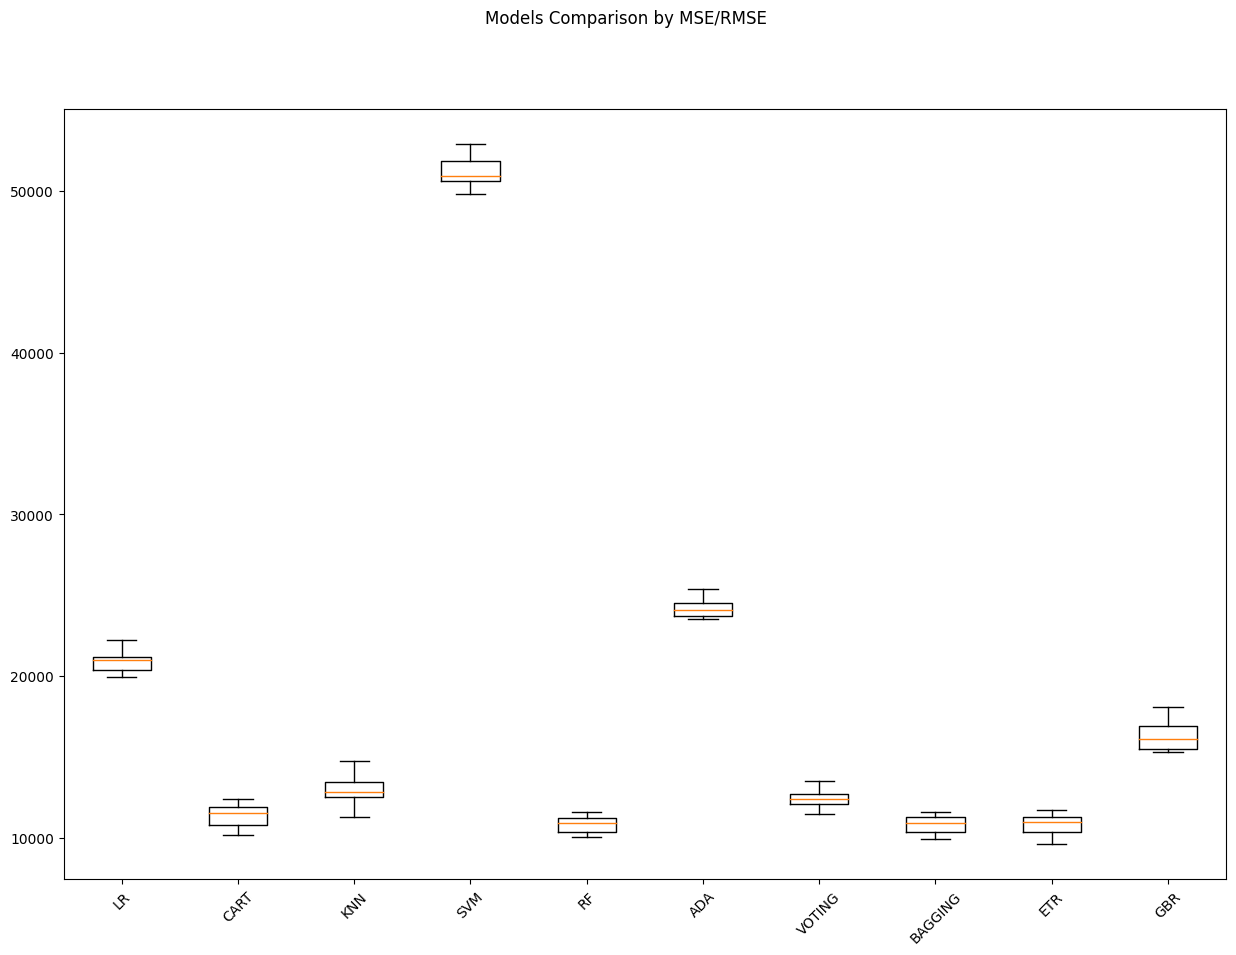

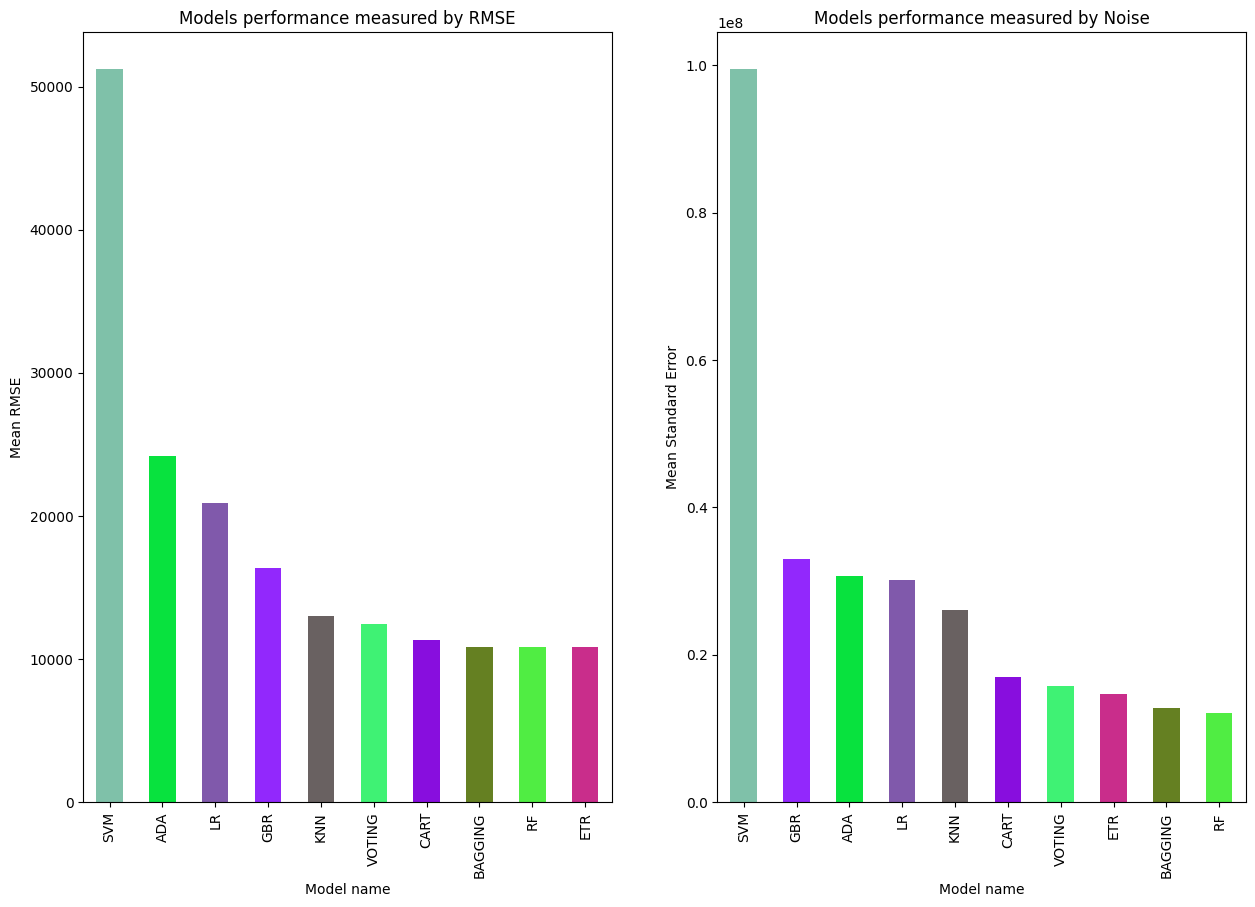

In [31]:
models_evaluator.generate_performance_report(names, results, report_df)

#Avaliação com rescaling

In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

minMaxScaler = ('MinMaxScaler', MinMaxScaler())
stdScaler = ('StandardScaler', StandardScaler() )

#### Usando MinMax

In [33]:
minMax_pipelines = [(model_name + '-minMaxScaled', Pipeline( [minMaxScaler, (model_name, model) ] )) for model_name, model in models]


In [34]:
names, results, report_df = models_evaluator.evaluate_models(minMax_pipelines, salaries_df_preprocessed, 'Salary')

LR-minMaxScaled			   MSE 437533249.17	 | STD:	 30109468.22	 | RMSE: 	 20917.30	 |
CART-minMaxScaled			   MSE 129201183.23	 | STD:	 16957861.97	 | RMSE: 	 11366.67	 |
KNN-minMaxScaled			   MSE 188015702.65	 | STD:	 26942068.43	 | RMSE: 	 13711.88	 |
SVM-minMaxScaled			   MSE 2676414681.54	 | STD:	 100827145.20	 | RMSE: 	 51734.08	 |
RF-minMaxScaled			   MSE 117276836.91	 | STD:	 12096549.47	 | RMSE: 	 10829.44	 |
ADA-minMaxScaled			   MSE 584989307.91	 | STD:	 30130996.17	 | RMSE: 	 24186.55	 |
VOTING-minMaxScaled			   MSE 155112084.72	 | STD:	 14750884.52	 | RMSE: 	 12454.40	 |
BAGGING-minMaxScaled			   MSE 117375392.10	 | STD:	 12779956.49	 | RMSE: 	 10833.99	 |
ETR-minMaxScaled			   MSE 116917502.25	 | STD:	 14647479.74	 | RMSE: 	 10812.84	 |
GBR-minMaxScaled			   MSE 267152586.42	 | STD:	 32755608.45	 | RMSE: 	 16344.80	 |


In [35]:
report_df.iloc[:,:-1]

,MSE,STD,RMSE
NAME,,,
ETR-minMaxScaled,1.169175e+08,1.464748e+07,10812.839694
RF-minMaxScaled,1.172768e+08,1.209655e+07,10829.443056
BAGGING-minMaxScaled,1.173754e+08,1.277996e+07,10833.992436
CART-minMaxScaled,1.292012e+08,1.695786e+07,11366.669839
VOTING-minMaxScaled,1.551121e+08,1.475088e+07,12454.400215
KNN-minMaxScaled,1.880157e+08,2.694207e+07,13711.881806
GBR-minMaxScaled,2.671526e+08,3.275561e+07,16344.803040
LR-minMaxScaled,4.375332e+08,3.010947e+07,20917.295455
ADA-minMaxScaled,5.849893e+08,3.013100e+07,24186.552212


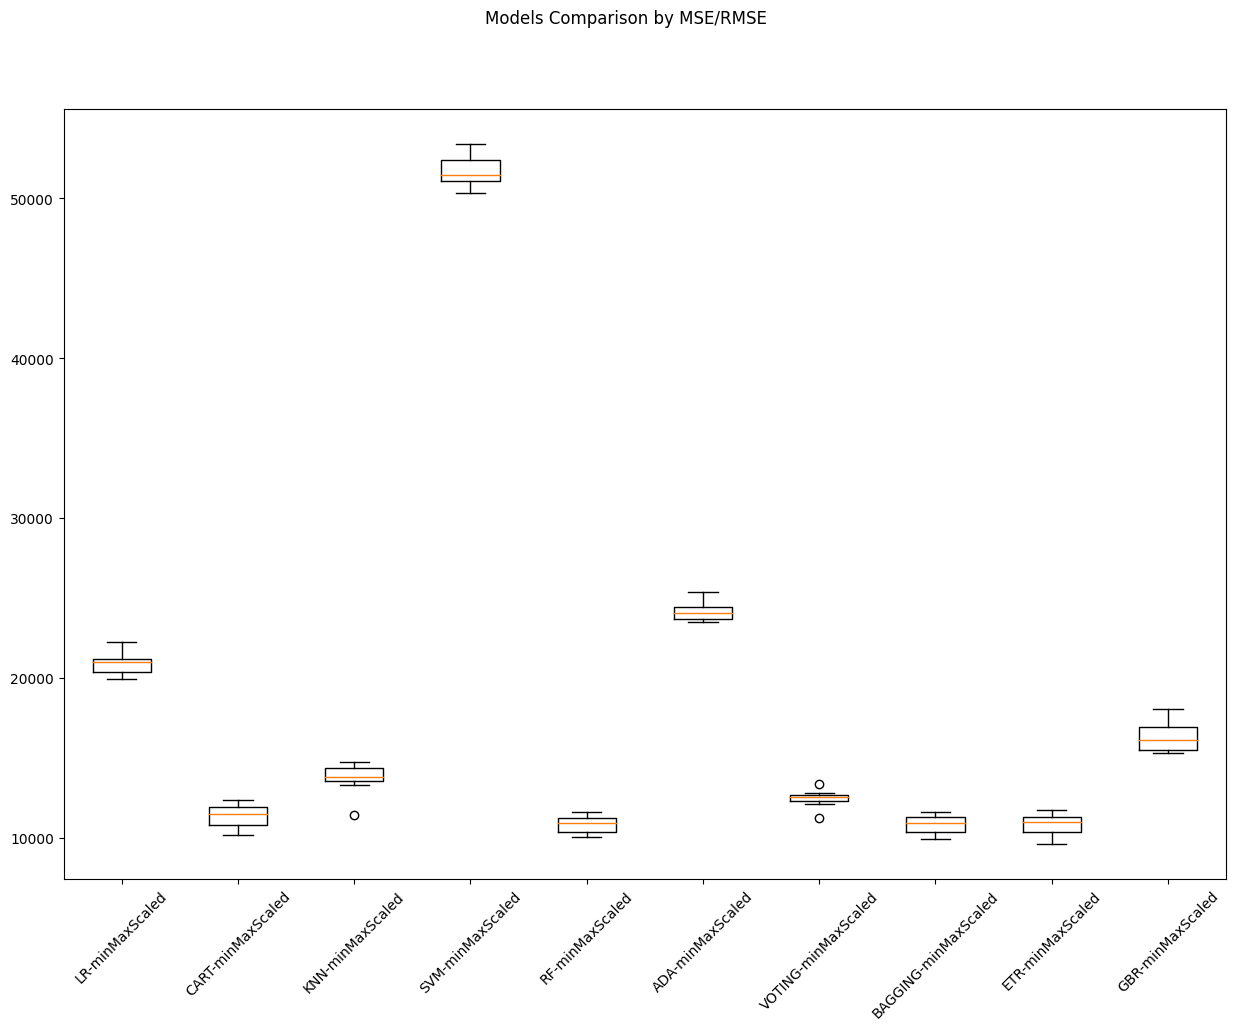

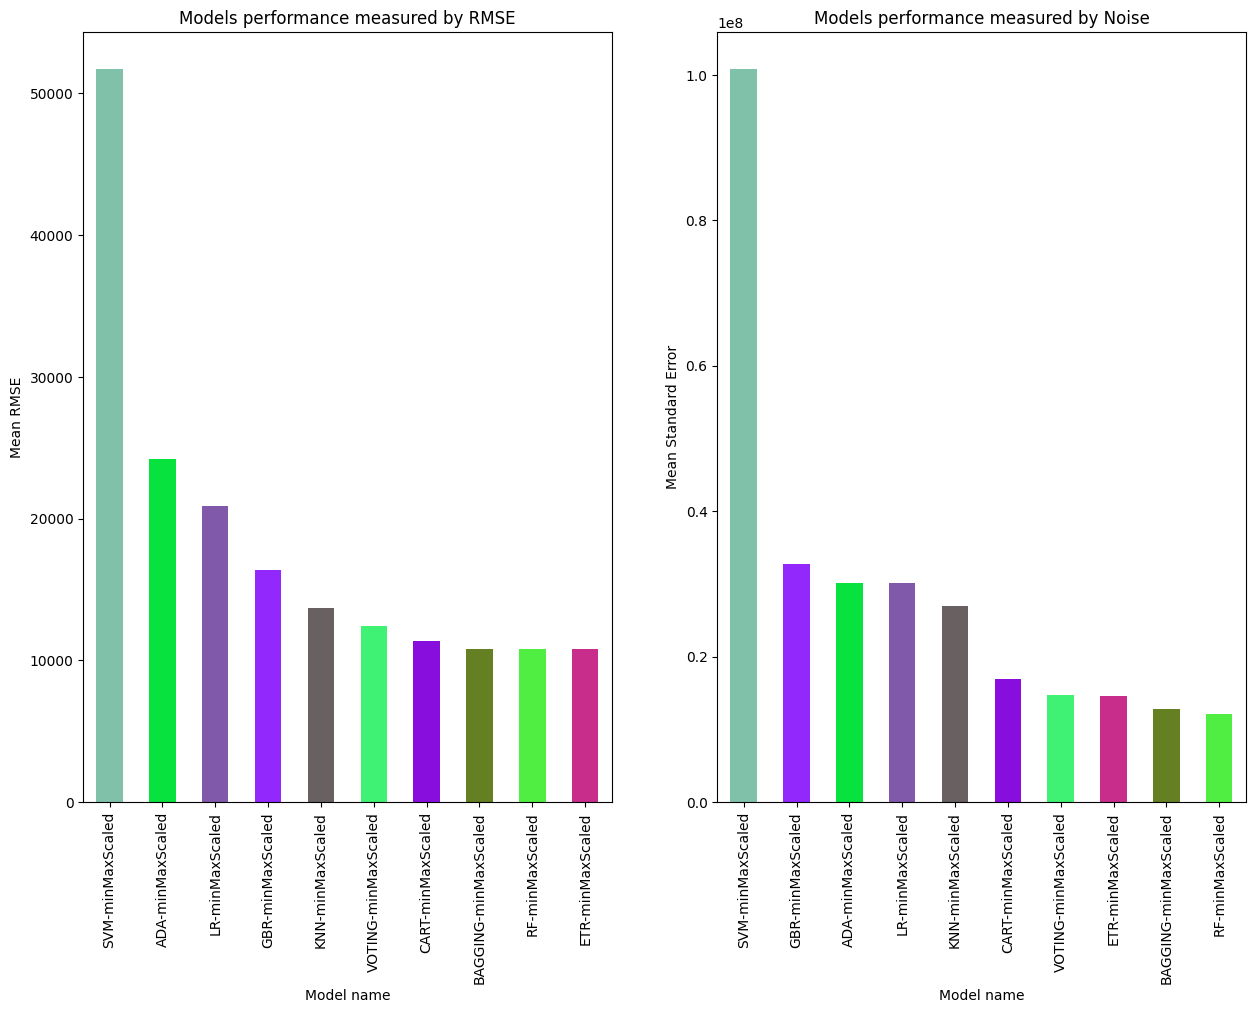

In [36]:
models_evaluator.generate_performance_report(names, results, report_df)

#Usando a Padronização

In [37]:
std_pipelines = [(model_name + '-stdScaler', Pipeline( [stdScaler, (model_name, model) ] )) for model_name, model in models]


In [38]:
names, results, report_df = models_evaluator.evaluate_models(std_pipelines, salaries_df_preprocessed, 'Salary')

LR-stdScaler			   MSE 438311825.61	 | STD:	 30600708.71	 | RMSE: 	 20935.90	 |
CART-stdScaler			   MSE 129327305.42	 | STD:	 16927729.86	 | RMSE: 	 11372.22	 |
KNN-stdScaler			   MSE 174845186.52	 | STD:	 24757874.25	 | RMSE: 	 13222.90	 |
SVM-stdScaler			   MSE 2678501940.84	 | STD:	 100801733.21	 | RMSE: 	 51754.25	 |
RF-stdScaler			   MSE 117663385.54	 | STD:	 12518566.52	 | RMSE: 	 10847.28	 |
ADA-stdScaler			   MSE 599872641.11	 | STD:	 28439631.19	 | RMSE: 	 24492.30	 |
VOTING-stdScaler			   MSE 153614443.91	 | STD:	 15054537.66	 | RMSE: 	 12394.13	 |
BAGGING-stdScaler			   MSE 116962471.45	 | STD:	 13129608.21	 | RMSE: 	 10814.92	 |
ETR-stdScaler			   MSE 117447254.17	 | STD:	 14483971.92	 | RMSE: 	 10837.31	 |
GBR-stdScaler			   MSE 266978450.21	 | STD:	 32969733.19	 | RMSE: 	 16339.48	 |


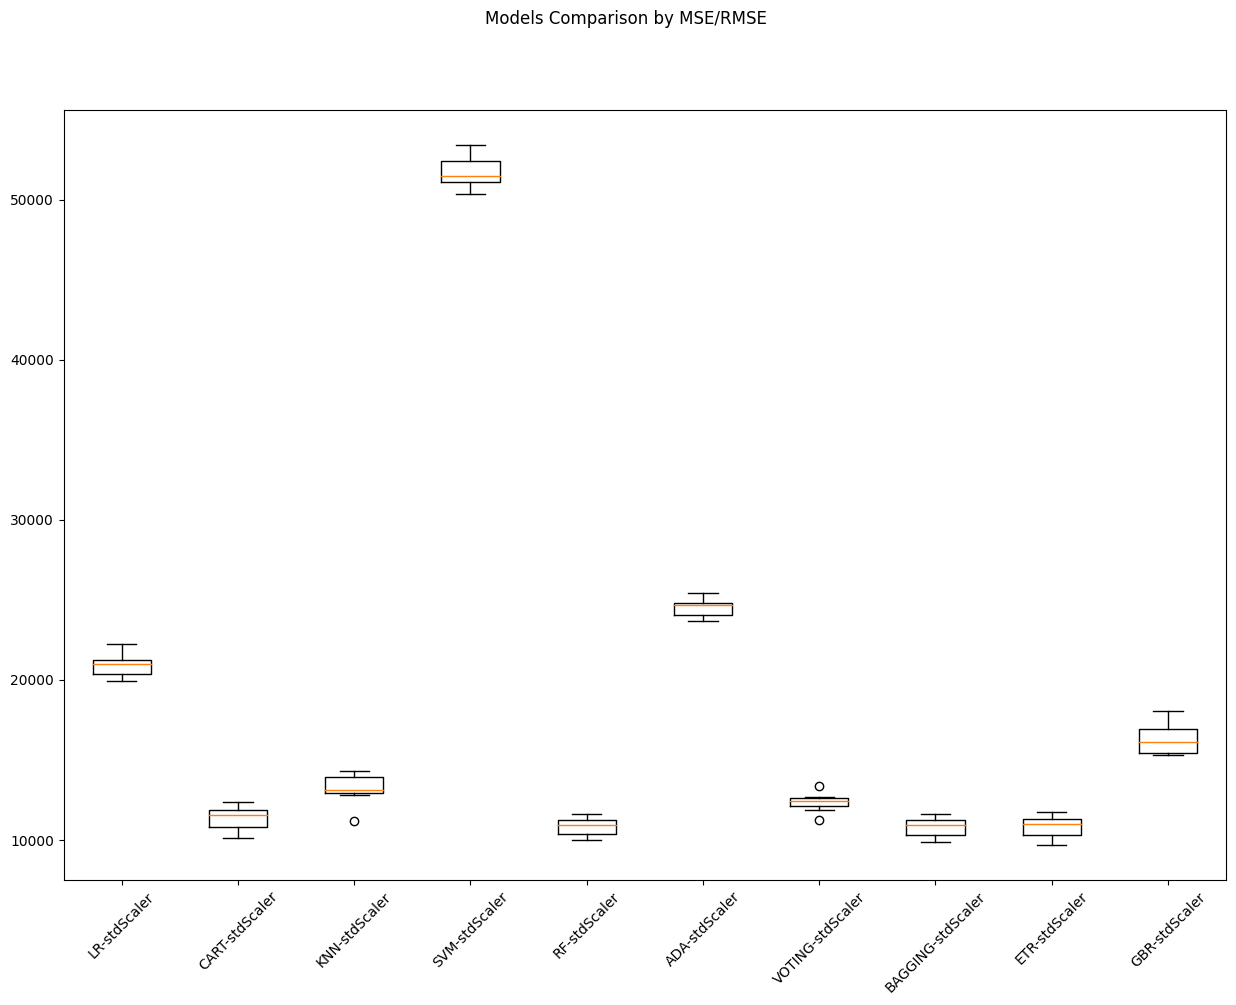

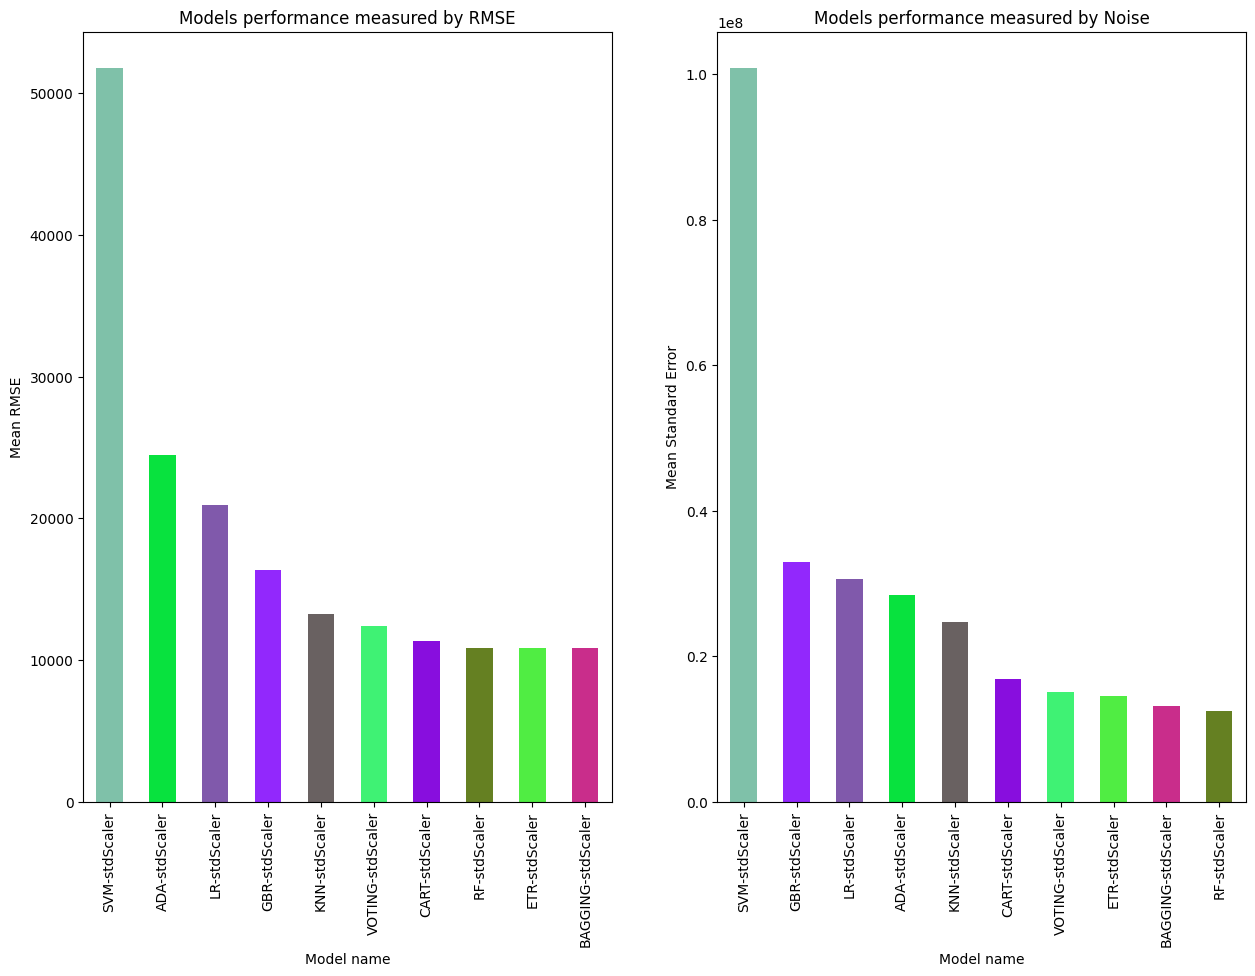

In [39]:
models_evaluator.generate_performance_report(names, results, report_df)